In [9]:
import glob
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ssha_data_files = glob.glob("data/ssha/*.txt")
print(ssha_data_files[:1])

['data/ssha/070_09_Dec_2004.txt']


187
188
(187, 188)


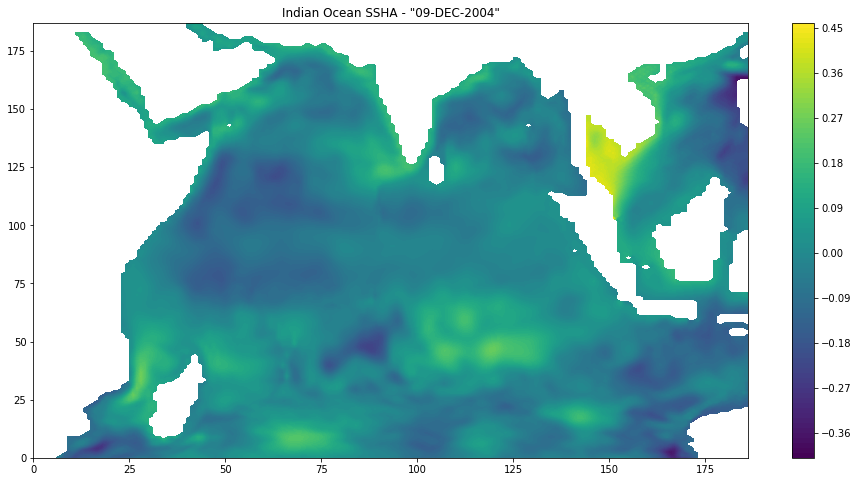

In [48]:
idx = 0

BAD_FLAG = '-1.E+34'

OCEAN = dict()
date = ""

with open(ssha_data_files[0],'r') as f:
    while(f):
        r = f.readline()
        if r != '':
            if idx >= 10:
                data = r.strip().split(',')
                date = data[0]
                lon = float(data[2])
                lat = float(data[3])
                ssha = np.nan
                if data[4] != BAD_FLAG:
                    ssha = float(data[4])
                if lon not in OCEAN:
                    OCEAN[lon] = dict()
                OCEAN[lon][lat] = ssha

        else:
            break


        idx += 1

LAT = []
LON = []

for lon in OCEAN:
    LON.append(lon)
    for lat in OCEAN[lon]:
        LAT.append(lat)

LON = list(set(LON))
LAT = list(set(LAT))

LON.sort()
LAT.sort()

SSHA = np.zeros((len(LON),len(LAT)),np.float)

for i in range(len(LON)):
    for j in range(len(LAT)):
        SSHA[i][j] = OCEAN[LON[i]][LAT[j]]

print(len(LON))
print(len(LAT))
print(SSHA.shape)

lon, lat = np.meshgrid(LON, LAT)
fig = plt.figure(figsize=(16,8))
h = plt.contourf(SSHA.T,levels = 100)
plt.colorbar()
plt.title("Indian Ocean SSHA on {}".format(date.strip("\"")))
plt.show()
